# Statistically stationary?

1. Load the PKL file containing P, T and XYZ
2. Plot the time series at each point to check for a portion of statistical stationareity
3. Filter timeseries for the selected time portion.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, random

In [2]:
# Load data
RAWFILE = "pickledData_constg/PTX(1).pkl"
with open(RAWFILE,'rb') as f: rawdata = pickle.load(f)
T,X,P = rawdata['Time'],rawdata['xCoord'],rawdata['P']

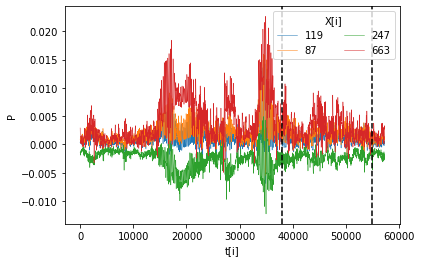

In [5]:
## Select a portion that looks homogeneous
t0,t1 = 38000,55000

# Plot a sample of the timeseries
fig,ax = plt.subplots()
P.sample(n=4,axis=1).plot(ax=ax,lw=0.5)
ax.axvline(x=t0,c='k',ls='dashed')
ax.axvline(x=t1,c='k',ls='dashed')
ax.legend(title="X[i]",ncol=2)
ax.set(ylabel="P",xlabel="t[i]")
plt.show()

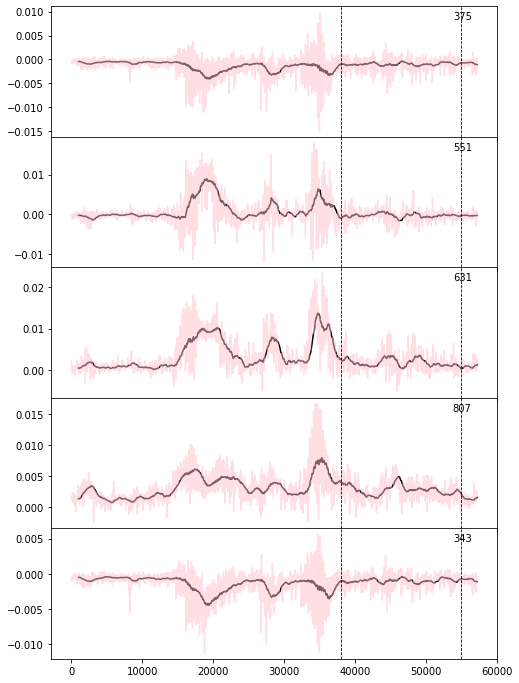

In [6]:
# Plot a sample of the timeseries with a rolling average
nSample = 5
fig,axs = plt.subplots(nrows=nSample,ncols=1,sharex=True,\
              figsize=[8,12],gridspec_kw={"hspace":0})

for ax,x in zip(axs,random.sample(list(P.columns),nSample)):
    cumP = (P.loc[:,x].rolling(1000).mean())
    ax.plot(cumP,zorder=2,c='k')
    ax.plot(P.loc[:,x],alpha=0.5,c='pink')
    ax.text(0.9,0.9,x,transform=ax.transAxes)
    ax.axvline(x=t0,c='k',ls='dashed',lw=0.8)
    ax.axvline(x=t1,c='k',ls='dashed',lw=0.8)
plt.show()

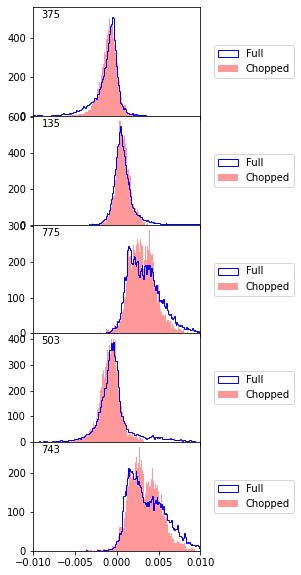

In [7]:
# Plot a histogram comparison of the full signal and the clipped one
fig,axs = plt.subplots(5,1,sharex=True,figsize=[3,10],gridspec_kw={"hspace":0})

hist_dict_full = dict(bins='sqrt',density=True,alpha=1.0,color='b',histtype='step',label='Full')
hist_dict_chop = dict(bins='sqrt',density=True,alpha=0.4,color='r',label='Chopped')

for ax,x in zip(axs,random.sample(list(P.columns),nSample)):
    ax.hist(P.loc[:,x],**hist_dict_full)
    ax.hist(P.loc[t0:t1,x],**hist_dict_chop)
    ax.text(0.05,0.9,x,transform=ax.transAxes)
    ax.legend(loc='center left',bbox_to_anchor = [1.05,0.5])
ax.set(xlim=[-0.01,0.01])
plt.show()

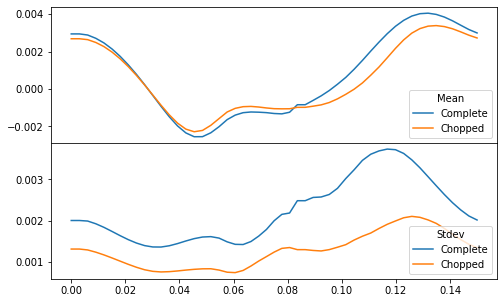

In [8]:
# Plot statistics over the X-Coordinate
fig,axs = plt.subplots(2,1,sharex=True,figsize=[8,5],gridspec_kw={"hspace":0})

ax = axs[0]
ax.plot(X['X'],P.mean(),label="Complete")
ax.plot(X['X'],P[t0:t1].mean(),label="Chopped")
ax.legend(title="Mean",loc='lower right')

ax = axs[1]
ax.plot(X['X'],P.std(),label="Complete")
ax.plot(X['X'],P[t0:t1].std(),label="Chopped")
ax.legend(title="Stdev",loc='lower right')

plt.show()

In [9]:
# Assemble a dict with the T,X and P
T,X,P = T[t0:t1],X,P[t0:t1]
fullDict = {"Time":T,"xCoord":X,"P":P}

In [10]:
# Pickle data
NEWFILE = "pickledData_constg/PTX(2).pkl"
with open(NEWFILE,'wb') as f: pickle.dump(fullDict,f)